In [1]:
import sys
sys.path.extend(['../'])
from strategy import Strategy
from backtest import Bt
import matplotlib.pyplot as plt
from plot import get_plotly
from data import Data
import pandas as pd
import time

# 做多 ＋ 做空(訊號轉換反手做)

In [2]:
Data().symbol_data(symbol=['AMD']).head()

open   high    low  close      volume  Dividends  Stock Splits  \
Date                                                                          
2000-01-03  14.97  15.59  14.69  15.50   7843200.0        0.0           0.0   
2000-01-04  15.12  15.50  14.59  14.62   6290200.0        0.0           0.0   
2000-01-05  14.53  15.06  14.00  15.00   8204600.0        0.0           0.0   
2000-01-06  15.50  16.00  15.25  16.00  11489400.0        0.0           0.0   
2000-01-07  15.41  16.41  15.38  16.25   8543400.0        0.0           0.0   

           symbol       date  
Date                          
2000-01-03    AMD 2000-01-03  
2000-01-04    AMD 2000-01-04  
2000-01-05    AMD 2000-01-05  
2000-01-06    AMD 2000-01-06  
2000-01-07    AMD 2000-01-07

In [7]:
class CCI(Strategy):
    def __init__(self):
        self.data = Data().symbol_data(symbol=['AMD'])
        self.init_capital = 10000
        self.cci = self.indicator('CCI')

    def signal(self, index):

        if (self.cci['CCI'][index] > -100) & (self.cci['CCI'][index - 1] < -100) & (not self.long_position):
            #先將做空部位買回，在做多
            if self.short_position:
                self.close_position()
            self.buy(unit=1, stop_loss=0.1, stop_profit=0.1)
        if (self.cci['CCI'][index] < 100) & (self.cci['CCI'][index - 1] > 100) & (not self.short_position):
            if self.long_position:
                self.close_position()
            self.sell(unit=-1)   




In [8]:
log, per = Bt(CCI, commission=0.08).run()

-----------------------------|
sharpe ratio | -1.096 --------|
-----------------------------|
calarm ratio | -0.003 --------|
-----------------------------|


In [9]:
log.head()

BuyDate  BuyPrice  BuyUnits  CashPaying   SellDate  SellPrice  SellUnits  \
0 2000-03-02     20.22         1     21.8376 2000-02-16     21.880         -1   
1 2000-03-02     20.22         1     21.8376 2000-03-06     22.242         -1   
2 2000-05-12     43.53         1     47.0124 2000-03-13     24.160         -1   
3 2000-05-12     43.53         1     47.0124 2000-05-23     39.177         -1   
4 2000-05-31     42.94         1     46.3752 2000-06-08     45.000         -1   

   CashReceiving  KeepDay  profit(元)  報酬率(%)  累積報酬率(%)  MDD(%)      Equity  \
0       20.12960      -15   -1.70800  -7.821    -7.821   7.256  9998.29200   
1       20.46264        4   -1.37496  -6.296   -13.625   0.000  9996.91704   
2       22.22720      -60  -24.78520 -52.721   -59.163  91.667  9972.13184   
3       36.04284       11  -10.96956 -23.333   -68.691  14.689  9961.16228   
4       41.40000        8   -4.97520 -10.728   -72.050   4.522  9956.18708   

   EquityReturn  EquityAccumulateReturn  
0     -0.017080                  -0.017  
1     -0.013752                  -0.031  
2     -0.247928                  -0.279  
3     -0.110002                  -0.388  
4     -0.049946                  -0.438

In [10]:
per.head()

年度總損益(元)  作多次數(次)  作空次數(次)  交易總次數(次)  勝率(%)  獲利因子  最大損失(元)  最大獲利(元)  \
2000    -73.85       11        6        17  17.65  0.10    -25.0      4.0   
2001    -69.99       13        7        20   0.00  0.00     -9.0      0.0   
2002    -27.93       14        8        22   4.55  0.05     -4.0      1.0   
2003    -19.99        6        4        10  10.00  0.03     -5.0      1.0   
2004    -47.72       10        8        18   5.56  0.02    -12.0      1.0   

     個股年度報酬(%)  當年度報酬率(%)  平均交易報酬率(%)  累積年度報酬(%)  當年度權益報酬率(%)  權益累積年度報酬(%)  \
2000     -7.75     -91.96       -5.41     -91.96        -0.74        -0.74   
2001     12.32     -97.29       -4.86     -99.78        -0.71        -1.44   
2002    -60.32     -92.36       -4.20     -99.98        -0.28        -1.72   
2003    127.13     -87.83       -8.78    -100.00        -0.20        -1.92   
2004     45.83     -95.89       -5.33    -100.00        -0.49        -2.39   

          權益  年化報酬率(%)  權益年化報酬率(%)  大盤年化報酬率(%)  
2000  9926.0    -91.96       -0.74       -9.27  
2001  9856.0    -95.31       -0.72      -11.18  
2002  9828.0    -94.15       -0.58      -15.44  
2003  9808.0   -100.00       -0.48       -6.51  
2004  9761.0   -100.00       -0.48       -3.59

/Users/apple/Documents/PythonProject/alphabt/plot.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/apple/Documents/PythonProject/alphabt/backtest.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/apple/Documents/PythonProject/alphabt/plot.py:26: SettingWithCopyWarning:


A value is

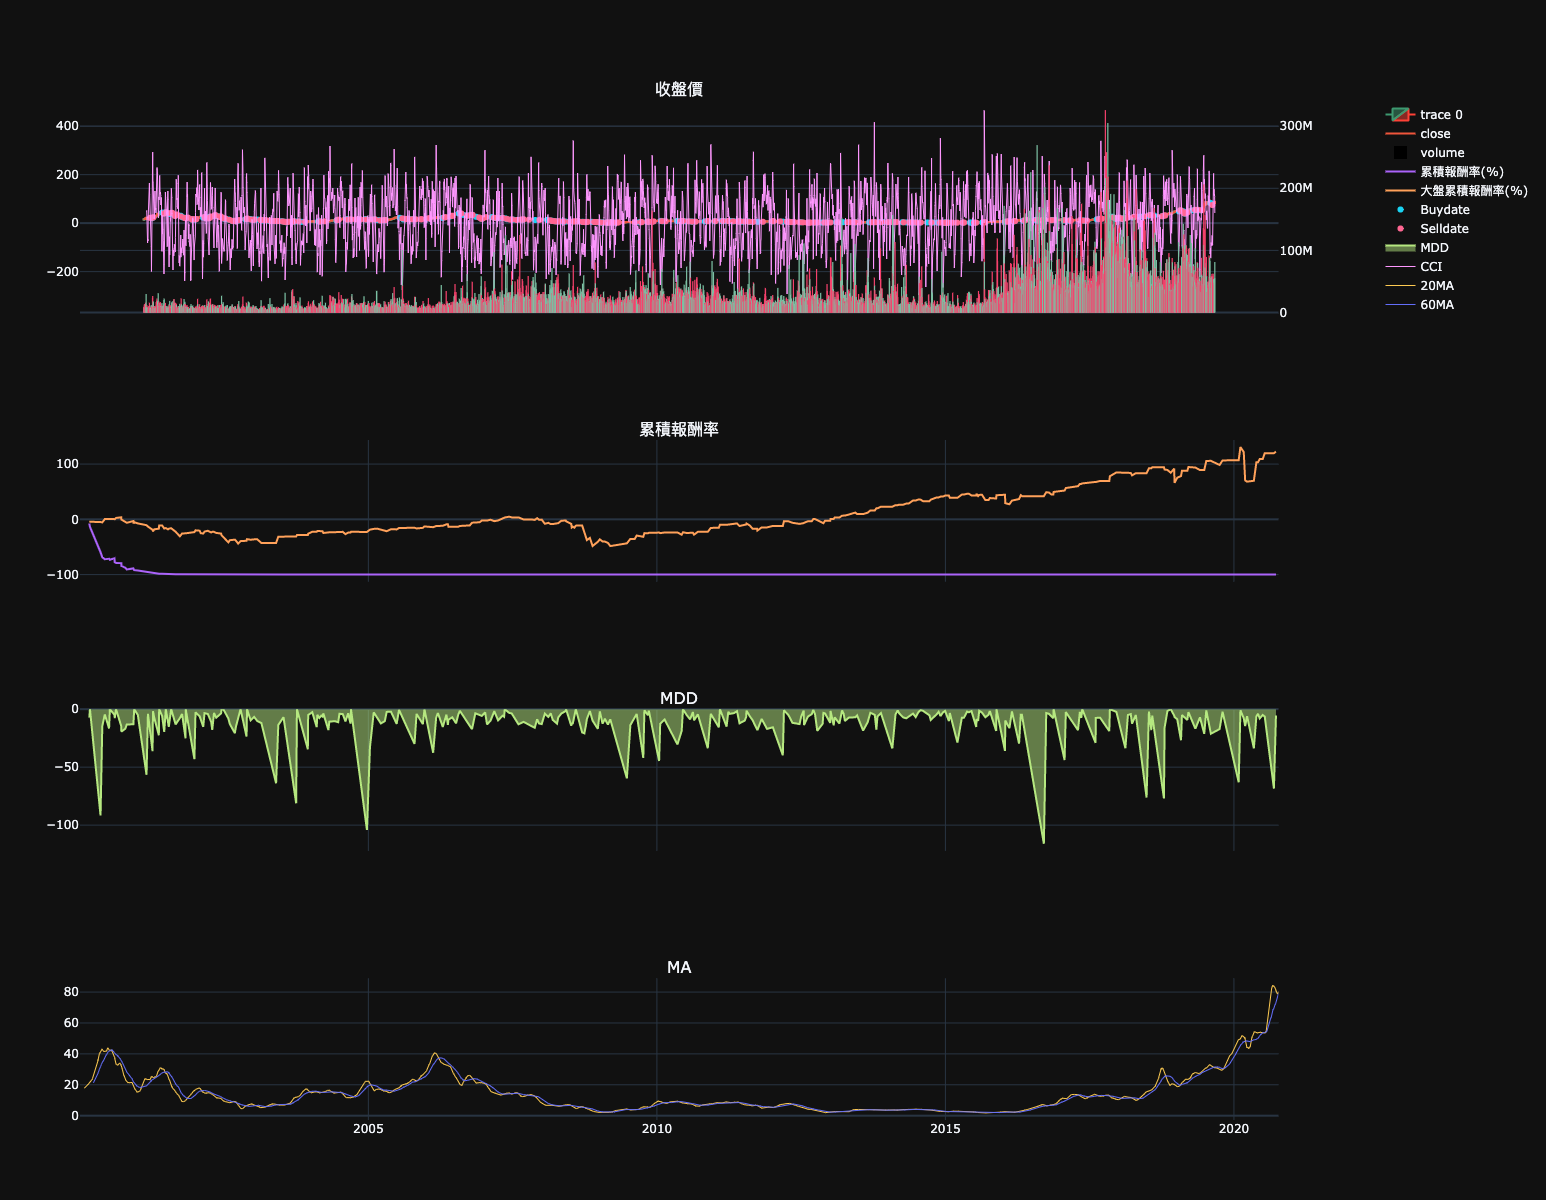

In [12]:
Bt(CCI).get_plot(subplot_technical_index=['MA'], overlap=['CCI'], sub_plot_param={'MA':[20, 60]}, overlap_param=None, log=log)
